WEIGHT PREDICTION THROUGH AGE GENDER AND HEIGHT

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/weight-height.csv")

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
data.shape

(10000, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [7]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [8]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [9]:
#label encoding( will convert the object value of gender to 0 or 1)
from sklearn.preprocessing import LabelEncoder

In [10]:
#created an object for labelEncoder function
encoder= LabelEncoder()

In [11]:
#fit_transform will help in transforming the gender row in numerical value
data["Gender"] = encoder.fit_transform(data["Gender"])

In [12]:
#male=1, female=0
data.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [13]:
#how many male and females
data["Gender"].value_counts()

1    5000
0    5000
Name: Gender, dtype: int64

In [14]:
import seaborn as sns

<Axes: xlabel='Gender', ylabel='count'>

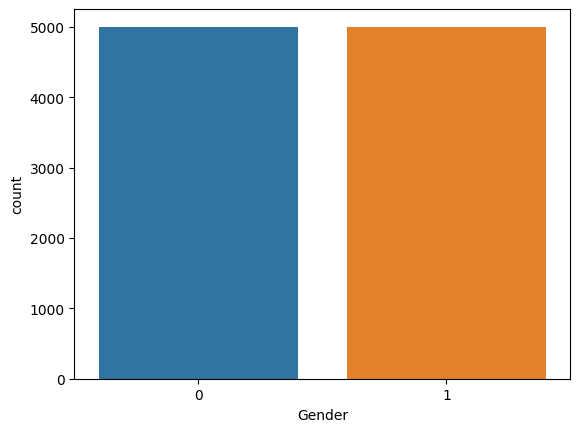

In [15]:
sns.countplot(x=(data["Gender"]), data=data)

In [17]:
#splitting the data
#as we dont needed weight in x variable we droped it and put it in y variable
x=data.drop(columns="Weight", axis=1)
y=data["Weight"]

In [19]:
x


,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796
...,...,...
9995,0,66.172652
9996,0,67.067155
9997,0,63.867992
9998,0,69.034243


In [20]:
y


0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
x.shape, x_train.shape, x_test.shape

((10000, 2), (8000, 2), (2000, 2))

In [31]:
#model creation
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()

In [36]:
model.fit(x_train, y_train) 

LinearRegression()

In [37]:
prediction= model.predict(x_test)

In [38]:
from sklearn.metrics import r2_score

In [40]:
score= r2_score(prediction, y_test)

In [41]:
score

0.8942026073927826

In [42]:
#building predictive system
new_data=[[0,74]] #(gender,height(inches))
weight= model.predict(new_data)
print(weight) # in pounds
print(weight*0.45)  # in kg

[197.2481918]
[88.76168631]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
